<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), data scientist @ Mail.Ru Group <br>
Translated and edited by Sergey Isaev, Artem Trunov, Anastasia Manokhina, and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository). Choose the answers in the [web-form](https://docs.google.com/forms/d/1ws9mchvdVGRyva_y_cPjASED8ATZTOsQFKfimohNaFE).**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [5]:
data = pd.read_csv('../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [8]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [10]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [13]:
data['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

**4. Make a population histogram (*bar plot*) of people's education (*education* feature).**

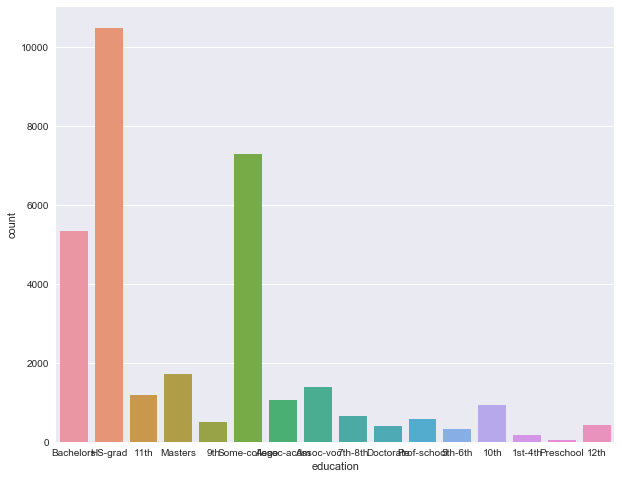

In [14]:
sns.countplot(x='education', data=data)

**5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [17]:
data.groupby('salary')['age'].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [20]:
data[data['salary']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [21]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [26]:
is_married = lambda s: s.startswith("Married")
data["is_married"] = data['marital-status'].apply(is_married)
data[data['salary'] == '>50K']['is_married'].value_counts(normalize=True)

True     0.859074
False    0.140926
Name: is_married, dtype: float64

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [31]:
max_hour = data['hours-per-week'].max()
print(max_hour)
data[data['hours-per-week'] == max_hour].info()
data[data['hours-per-week'] == max_hour]['salary'].value_counts(normalize=True)

99
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 935 to 32531
Data columns (total 16 columns):
age               85 non-null int64
workclass         85 non-null object
fnlwgt            85 non-null int64
education         85 non-null object
education-num     85 non-null int64
marital-status    85 non-null object
occupation        85 non-null object
relationship      85 non-null object
race              85 non-null object
sex               85 non-null object
capital-gain      85 non-null int64
capital-loss      85 non-null int64
hours-per-week    85 non-null int64
native-country    85 non-null object
salary            85 non-null object
is_married        85 non-null bool
dtypes: bool(1), int64(6), object(9)
memory usage: 10.7+ KB


<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [32]:
data.groupby(['salary', 'native-country'])['hours-per-week'].mean()

salary  native-country            
<=50K   ?                             40.164760
        Cambodia                      41.416667
        Canada                        37.914634
        China                         37.381818
        Columbia                      38.684211
        Cuba                          37.985714
        Dominican-Republic            42.338235
        Ecuador                       38.041667
        El-Salvador                   36.030928
        England                       40.483333
        France                        41.058824
        Germany                       39.139785
        Greece                        41.809524
        Guatemala                     39.360656
        Haiti                         36.325000
        Holand-Netherlands            40.000000
        Honduras                      34.333333
        Hong                          39.142857
        Hungary                       31.300000
        India                         38.233333
     